In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

2024-12-05 19:08:01.685578: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733454481.706403  220123 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733454481.712642  220123 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 19:08:01.757461: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/cvmfs/software.igwn.org/conda/envs/igwn/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning:

In [3]:
print(f"TensorFlow version: {tf.__version__}")
print(tf.keras.__version__)
print(f"NumPy version: {np.__version__}")

TensorFlow version: 2.18.0
NumPy version: 1.24.2


In [5]:
# Define the path to the datasets

train_dir = 'data/train/train'
test_dir = 'data/test/test'
validation_dir = 'data/validation/validation'

In [6]:
# Define image size and batch size
epochs = 30
image_size = (569, 479)
batch_size = 32

# Load datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=image_size,
    batch_size=batch_size
)

# Optional: Prefetch for performance
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

Found 22348 files belonging to 22 classes.


2024-12-05 19:08:07.489917: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1733454487.491382  220123 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7744 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2024-12-05 19:08:07.491835: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1733454487.493197  220123 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 7915 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 4800 files belonging to 22 classes.


# Analysis

In [7]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf

# Directory to save plots
output_dir = "output_plots"
os.makedirs(output_dir, exist_ok=True)

# Load the saved model
model = tf.keras.models.load_model('model_traineverything_tf_epoch30_batch32.keras')

# Load test dataset
image_size = (569, 479)
batch_size = batch_size  # Keep the batch size consistent with the model's training
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,  # Replace `test_dir` with the path to your test data
    image_size=image_size,
    batch_size=batch_size
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Get true labels and predicted probabilities
true_labels = []
predicted_probs = []

# Loop through the dataset
for images, labels in test_dataset:
    true_labels.append(labels.numpy())  # Append the true labels for each batch
    predicted_probs.append(model.predict(images))  # Append the predicted probabilities for each batch

# Concatenate the list of batches into full arrays
true_labels = np.concatenate(true_labels)
predicted_probs = np.concatenate(predicted_probs)

# Get predicted classes (for confusion matrix and classification report)
predicted_classes = np.argmax(predicted_probs, axis=1)

Found 4720 files belonging to 22 classes.


I0000 00:00:1733454495.094956  220555 service.cc:148] XLA service 0x7f6af40024d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733454495.094984  220555 service.cc:156]   StreamExecutor device (0): NVIDIA A100-PCIE-40GB, Compute Capability 8.0
I0000 00:00:1733454495.094987  220555 service.cc:156]   StreamExecutor device (1): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2024-12-05 19:08:15.396849: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733454496.029888  220555 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-05 19:08:16.666416: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2429', 88 bytes spill stores, 88 bytes spill loads

2024-12-05 19:08:16.666840: I external/local_xla/xla/stream_executor/

  2/148 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.9453 - loss: 0.2817  

I0000 00:00:1733454504.738741  220555 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


146/148 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9572 - loss: 0.3037

2024-12-05 19:08:32.155651: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2429', 88 bytes spill stores, 88 bytes spill loads



148/148 ━━━━━━━━━━━━━━━━━━━━ 25s 87ms/step - accuracy: 0.9573 - loss: 0.3030
Test Loss: 0.2661684453487396
Test Accuracy: 0.9610169529914856
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 

2024-12-05 19:09:10.924530: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [8]:
class_names = test_dataset.class_names

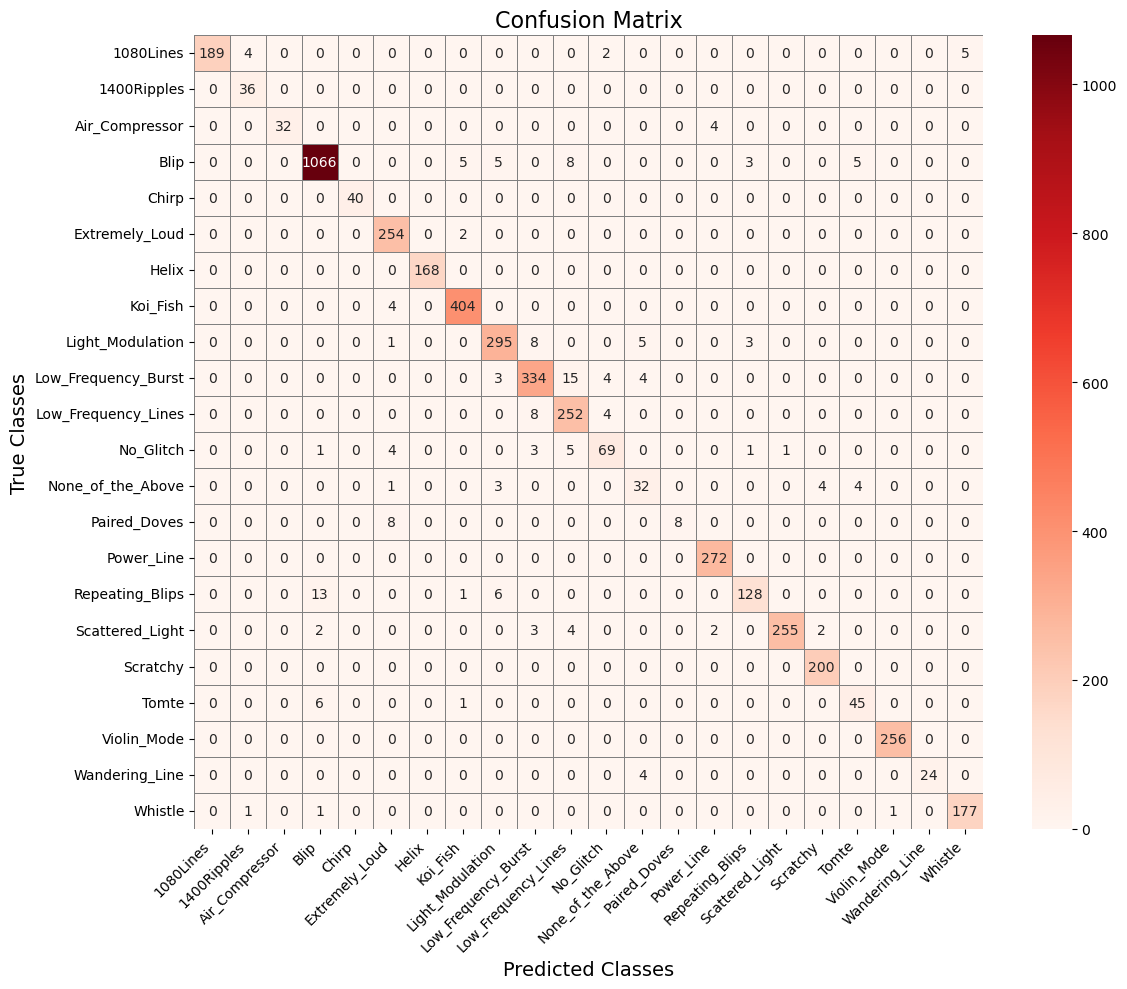

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# Define the figure size and colormap
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=True, 
            xticklabels=class_names, yticklabels=class_names, linewidths=0.5, linecolor='gray')

# Adjust labels and titles
plt.xlabel('Predicted Classes', fontsize=14)
plt.ylabel('True Classes', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Save the plot
plt.tight_layout()
plt.savefig(os.path.join(output_dir, f'tensorflow_everywhere_clean_confusion_matrix_epoch{epochs}_batch{batch_size}.png'), dpi=300)
plt.show()

In [11]:
# Plot ROC curves for each class
n_classes = len(class_names)
fpr = {}
tpr = {}
roc_auc = {}

In [12]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((true_labels == i).astype(int), predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

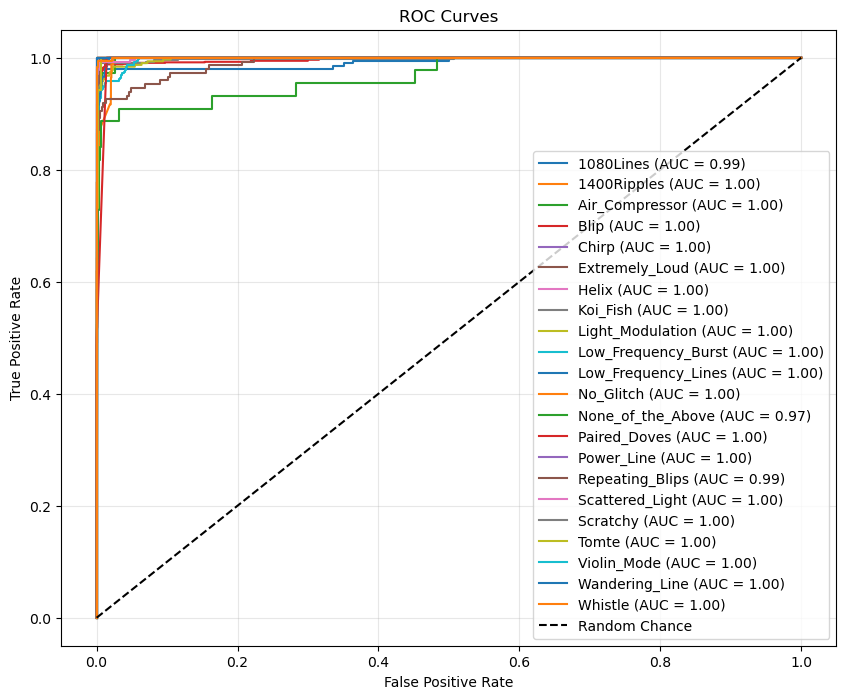

In [13]:
# Plot the ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.savefig(os.path.join(output_dir, f'tensorflow_everywhere_roc_curves_epoch{epochs}_batch{batch_size}.png'), dpi=300, bbox_inches='tight')
plt.show()

In [15]:
# F1 Score 

from sklearn.metrics import f1_score

f1_scores = f1_score(true_labels, predicted_classes, average=None)
print("F1 Scores:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {f1_scores[i]:.2f}")

# Precision

from sklearn.metrics import precision_score

precision_scores = precision_score(true_labels, predicted_classes, average=None)
print("Precision Scores:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {precision_scores[i]:.2f}")

# Recall

from sklearn.metrics import recall_score

recall_scores = recall_score(true_labels, predicted_classes, average=None)
print("Recall Scores:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {recall_scores[i]:.2f}")

F1 Scores:
1080Lines: 0.97
1400Ripples: 0.94
Air_Compressor: 0.94
Blip: 0.98
Chirp: 1.00
Extremely_Loud: 0.96
Helix: 1.00
Koi_Fish: 0.98
Light_Modulation: 0.95
Low_Frequency_Burst: 0.93
Low_Frequency_Lines: 0.92
No_Glitch: 0.85
None_of_the_Above: 0.72
Paired_Doves: 0.67
Power_Line: 0.99
Repeating_Blips: 0.90
Scattered_Light: 0.97
Scratchy: 0.99
Tomte: 0.85
Violin_Mode: 1.00
Wandering_Line: 0.92
Whistle: 0.98
Precision Scores:
1080Lines: 1.00
1400Ripples: 0.88
Air_Compressor: 1.00
Blip: 0.98
Chirp: 1.00
Extremely_Loud: 0.93
Helix: 1.00
Koi_Fish: 0.98
Light_Modulation: 0.95
Low_Frequency_Burst: 0.94
Low_Frequency_Lines: 0.89
No_Glitch: 0.87
None_of_the_Above: 0.71
Paired_Doves: 1.00
Power_Line: 0.98
Repeating_Blips: 0.95
Scattered_Light: 1.00
Scratchy: 0.97
Tomte: 0.83
Violin_Mode: 1.00
Wandering_Line: 1.00
Whistle: 0.97
Recall Scores:
1080Lines: 0.94
1400Ripples: 1.00
Air_Compressor: 0.89
Blip: 0.98
Chirp: 1.00
Extremely_Loud: 0.99
Helix: 1.00
Koi_Fish: 0.99
Light_Modulation: 0.95
Low_F

In [16]:
# Misclassified pairs

misclassified_pairs = [(class_names[i], class_names[j], conf_matrix[i, j]) 
                       for i in range(len(class_names)) 
                       for j in range(len(class_names)) if i != j and conf_matrix[i, j] > 0]
print("Top Misclassifications:")
print(sorted(misclassified_pairs, key=lambda x: -x[2])[:5])  # Top 5 misclassifications

Top Misclassifications:
[('Low_Frequency_Burst', 'Low_Frequency_Lines', 15), ('Repeating_Blips', 'Blip', 13), ('Blip', 'Low_Frequency_Lines', 8), ('Light_Modulation', 'Low_Frequency_Burst', 8), ('Low_Frequency_Lines', 'Low_Frequency_Burst', 8)]
